In [1]:
# Abilita l'interattività per VSCode
%matplotlib widget

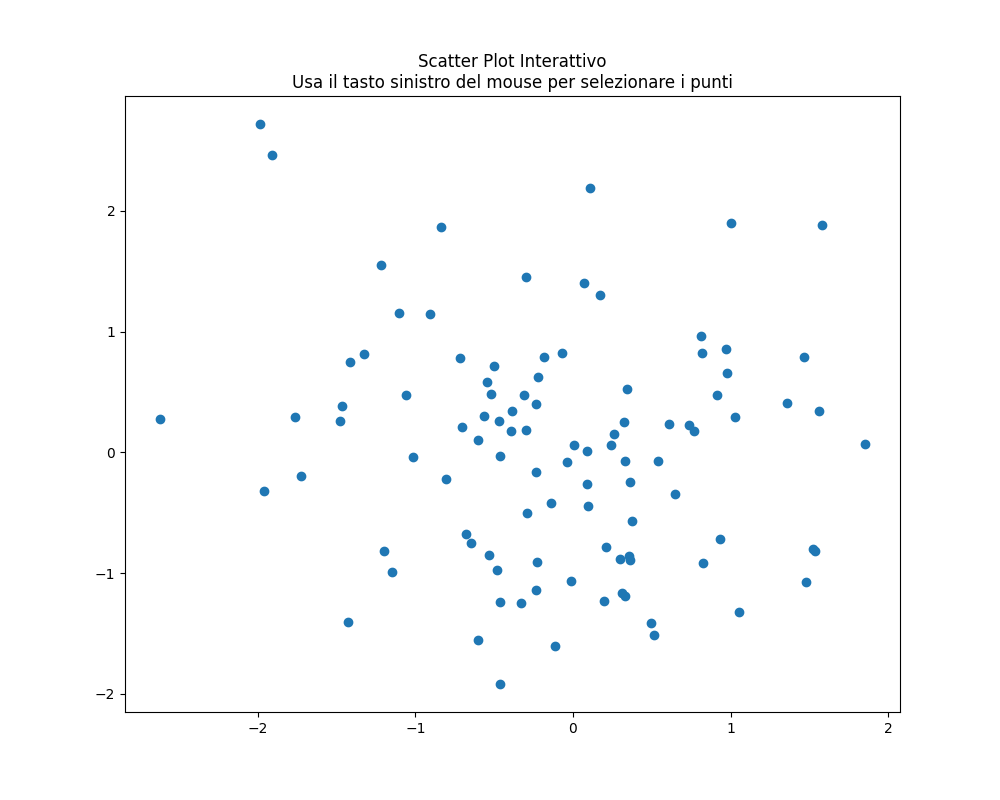

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import LassoSelector
from matplotlib.path import Path

# Creiamo alcuni dati di esempio
np.random.seed(42)
x_data = np.random.normal(0, 1, 100)
y_data = np.random.normal(0, 1, 100)

# Creiamo la figura e l'asse
plt.ioff()  # Disattiva la modalità interattiva temporaneamente
fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(x_data, y_data, picker=True)
ax.set_title('Scatter Plot Interattivo\nUsa il tasto sinistro del mouse per selezionare i punti')

# Variabile per memorizzare i punti selezionati
selected_points = []

# Classe per gestire la selezione
class SelectPoints:
    def __init__(self, ax, scatter):
        self.ax = ax
        self.scatter = scatter
        self.xys = scatter.get_offsets()
        self.lasso = LassoSelector(ax, onselect=self.on_select)
        
    def on_select(self, verts):
        path = Path(verts)
        ind = path.contains_points(self.xys)
        
        # Resetta i colori di tutti i punti
        self.scatter.set_facecolors('blue')
        
        # Colora i punti selezionati
        self.scatter.set_facecolors(np.where(ind, 'red', 'blue'))
        
        # Memorizza i punti selezionati
        global selected_points
        selected_points = [(x_data[i], y_data[i]) for i in range(len(ind)) if ind[i]]
        
        # Aggiorna il grafico
        fig.canvas.draw_idle()

# Inizializza il selettore
selector = SelectPoints(ax, scatter)

plt.ion()  # Riattiva la modalità interattiva
plt.show()

In [ ]:
selected_points